In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from math import sqrt

%matplotlib inline

base_url = 'https://raw.githubusercontent.com/aisaacso/alirepo/master/'
crime_url = base_url + 'Crime_Incident_Reports.csv'
empl_url = base_url + 'Employee_Earnings_Report_2014.csv'

crime_df = pd.read_csv(crime_url)
employee_df = pd.read_csv(empl_url, dtype = {'NAME': str, 'TITLE': str})

employee_df.rename(columns = {'DEPARTMENT NAME':'DeptName'}, inplace = True)
employee_df.rename(columns={'TOTAL EARNINGS': 'TotEarn'}, inplace = True)

def currency_to_float(val):
    val = float(val.replace('$', ''))
    return val

curr_cols = list(employee_df)[3:11]

for c in curr_cols:
    employee_df[c] = employee_df[c].map(currency_to_float)

/Users/annaisaacson/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


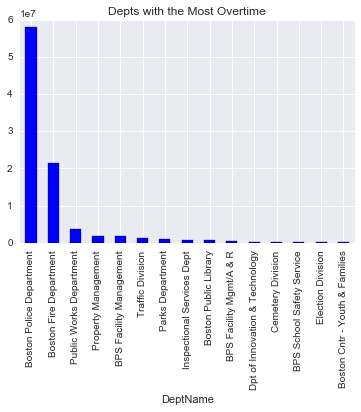

In [33]:
# Which department gets the most overtime?
ot_pivot = pd.pivot_table(employee_df, index = 'DeptName', aggfunc = 'sum')
top_ten_ot = ot_pivot.sort_values('OVERTIME', axis = 0, ascending = False).head(15)
top_ten_ot['OVERTIME'].plot(kind = 'bar', title='Depts with the Most Overtime')